# Heart Disease

Heart Disease | Prediction
- | -
<img src="health-robot.jpg" width="240px"> | <img src="heart-attack.jpg" width="300px"> 

# Importando las librerias

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys

import sklearn
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers.core import Dense

from IPython.display import HTML

# Cargando los datos

In [102]:
trainx = pd.read_csv("./heart.csv")

In [103]:
trainx.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [104]:
trainx.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Significado de los atributos
<ul>
    <li>
        <h3>Age:</h3>
        Edad de la persona
    </li>
    <li>
        <h3>Sex:</h3>
        Sexo de la persona (1 para hombre, 0 para mujer)
    </li>
    <li>
        <h3>cp:</h3>
        Chest pain experienced - Experencia de dolor en el pecho
        0: angino tipico <br>
        1: angina atipico<br>
        2: Dolor no anginal<br>
        3: asymptomatico       
    </li>
        <li>
        <h3>trestbps:</h3>
        La presión arterial en reposo de la persona
    </li>
        <li>
        <h3>chol:</h3>
        Colesterol de la persona (mg/dl)
    </li>
        <li>
        <h3>fbs:</h3>
        El azúcar en sangre de la persona en ayunas (> 120 mg/dl, 1: true; 0: false) 
    </li>
        <li>
        <h3>restecg:</h3>
        resting electrocardiographic results <br>
        0: normal<br>
        1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)<br>
        2: showing probable or definite left ventricular hypertrophy by Estes' criteria
    </li>
        <li>
        <h3>thalach:</h3>
        El registro de la frecuencia cardíaca máxima de la persona
    </li>
        <li>
        <h3>Exang:</h3>
         Angina inducida por ejercicio (1: si; 0: no)
    </li>
    <li>
        <h3>oldpeak:</h3>
         Depresión del ST inducida por el ejercicio relativo al descanso
    </li>
    <li>
        <h3>slope:</h3>
         la pendiente del segmento pico del ejercicio ST<br>
         0: pendiente ascendente<br>
         1: plano<br>
         2: pendiente descendente<br>
    </li>
    <li>
        <h3>ca:</h3>
         El número de vasos principales (0-3)
    </li>
    <li>
        <h3>thal:</h3>
         Trastorno sanguíneo conocido como talasemia<br>
         3: normal<br>
         6: defecto fijo<br>
         7: efecto reversible
    </li>
       <li>
        <h3>Desease:</h3>
         0: No Enfermo<br>
         1: Enfermo
    </li> 
    
</ul>

In [105]:
# NAS
# trainx["age"] = trainx["age"].fillna(trainx["age"].median())
# trainx["cp"] = trainx["cp"].fillna(trainx["cp"].median())
# trainx["trestbps"] = trainx["trestbps"].fillna(trainx["trestbps"].median())
# trainx["chol"] = trainx["chol"].fillna(trainx["chol"].median())
# trainx["thalach"] = trainx["thalach"].fillna(trainx["thalach"].median())
# trainx["oldpeak"] = trainx["oldpeak"].fillna(trainx["oldpeak"].median())

In [106]:
# Category types
# trainx['sex'] = trainx['sex'].astype('category')
# trainx['cp'] = trainx['cp'].astype('category')
# trainx['fbs'] = trainx['fbs'].astype('category')
# trainx['restecg'] = trainx['restecg'].astype('category')
# trainx['exang'] = trainx['exang'].astype('category')
# trainx['slope'] = trainx['slope'].astype('category')
# trainx['thal'] = trainx['thal'].astype('category')
# trainx['ca'] = trainx['ca'].astype('category')
# trainx['target'] = trainx['target'].astype('category')

print(trainx.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


<h3>Datos completos</h3>

In [107]:
print(trainx.isnull().sum())
print("------------------")
print(trainx.isna().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64
------------------
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


# Gráficas de los datos

<h2>Histogramas</h2>

Variables:

<ul>
    <li>
    Age
    </li>
    <li>
    Trestbps
    </li>
    <li>
    chol
    </li>
    <li>
    Thalach
    </li>
    <li>
    Oldpeak
    </li>
</ul>

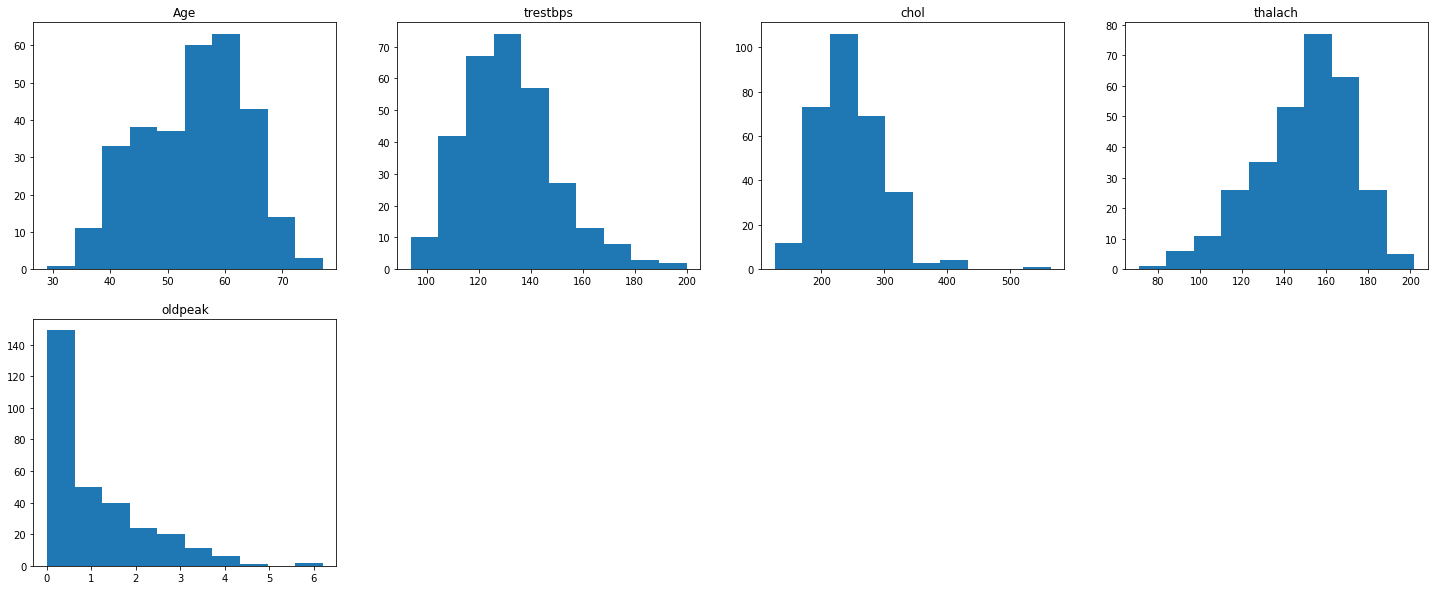

In [108]:
counts, bins = np.histogram(trainx["age"])
counts2, bins2 = np.histogram(trainx["trestbps"])
counts3, bins3 = np.histogram(trainx["chol"])
counts4, bins4 = np.histogram(trainx["thalach"])
counts5, bins5 = np.histogram(trainx["oldpeak"])

plt.figure(figsize=(25,10))

plt.subplot(2, 4, 1)
plt.hist(bins[:-1], bins, weights=counts)
plt.title('Age')
plt.ylabel('')

plt.subplot(2, 4, 2)
plt.hist(bins2[:-1], bins2, weights=counts2)
plt.title('trestbps')
plt.ylabel('')

plt.subplot(2, 4, 3)
plt.hist(bins3[:-1], bins3, weights=counts3)
plt.title('chol')
plt.ylabel('')

plt.subplot(2, 4, 4)
plt.hist(bins4[:-1], bins4, weights=counts4)
plt.title('thalach')
plt.ylabel('')

plt.subplot(2, 4, 5)
plt.hist(bins5[:-1], bins5, weights=counts5)
plt.title('oldpeak')
plt.ylabel('')


plt.show()

<h2>Tortas</h2>

Variables:

<ul>
    <li>
    Sex
    </li>
    <li>
    Fbs
    </li>
    <li>
    Restecg
    </li>
    <li>
    Exang
    </li>
    <li>
    Thal
    </li>
    <li>
    Cp
    </li>
    <li>
    Slope
    </li>
    <li>
    Ca
    </li>
    <li>
    Target
    </li>
</ul>

Text(0.5,1,'Target')

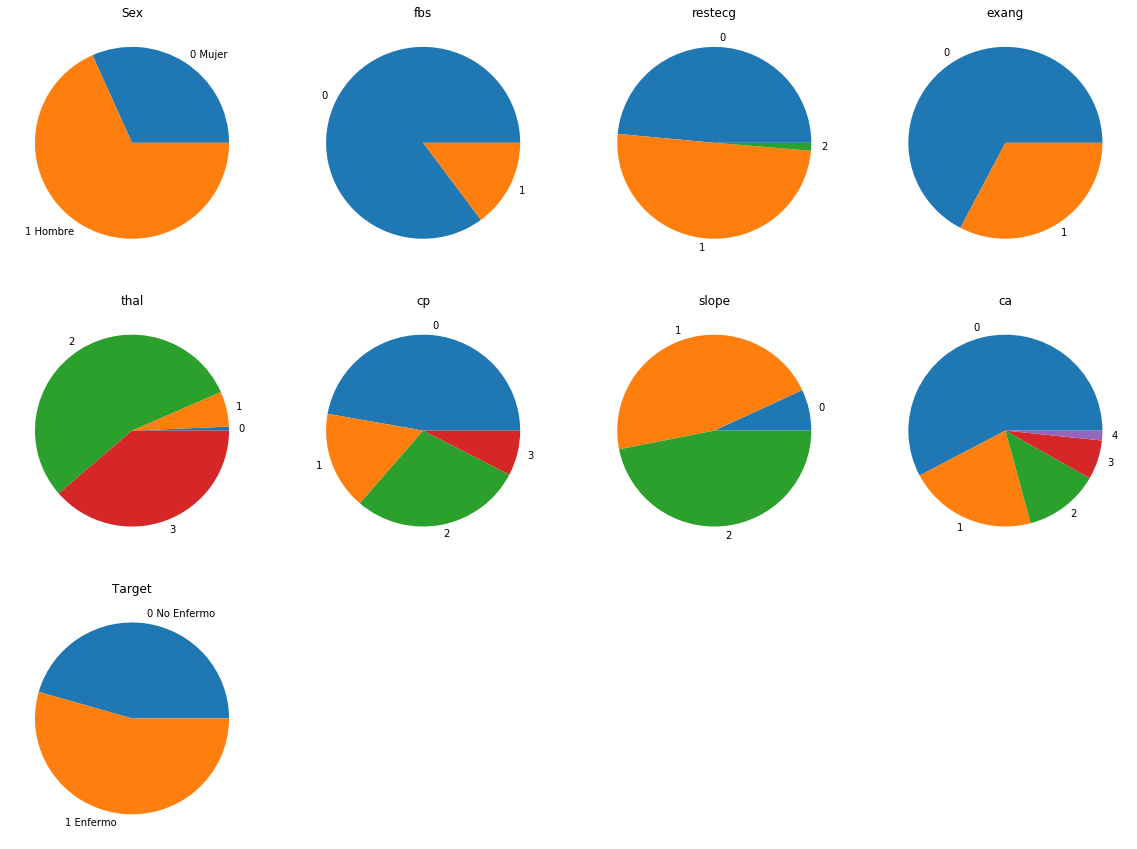

In [109]:
plt.figure(figsize=(20,15))

plt.subplot(3, 4, 1)
labels = ["0 Mujer", "1 Hombre"]
values = [trainx["sex"].count() - trainx["sex"].sum(), trainx["sex"].sum()]
plt.pie(values, labels=labels)
plt.title('Sex')

plt.subplot(3, 4, 2)
labels = ["0", "1"]
values = [trainx["fbs"].count() - trainx["fbs"].sum(), trainx["fbs"].sum()]
plt.pie(values, labels=labels)
plt.title('fbs')

plt.subplot(3, 4, 3)
labels = ["0", "1", "2"]
values = [trainx["restecg"][trainx["restecg"]==0].count(), trainx["restecg"][trainx["restecg"]==1].count(), trainx["restecg"][trainx["restecg"]==2].count()]
plt.pie(values, labels=labels)
plt.title('restecg')

plt.subplot(3, 4, 4)
labels = ["0", "1"]
values = [trainx["exang"].count() - trainx["exang"].sum(), trainx["exang"].sum()]
plt.pie(values, labels=labels)
plt.title('exang')

plt.subplot(3, 4, 5)
labels = ["0", "1", "2", "3"]
values = [trainx["thal"][trainx["thal"]==0].count(), trainx["thal"][trainx["thal"]==1].count(), trainx["thal"][trainx["thal"]==2].count(), trainx["thal"][trainx["thal"]==3].count()]
plt.pie(values, labels=labels)
plt.title('thal')

plt.subplot(3, 4, 6)
labels = ["0", "1", "2", "3"]
values = [trainx["cp"][trainx["cp"]==0].count(), trainx["cp"][trainx["cp"]==1].count(), trainx["cp"][trainx["cp"]==2].count(), trainx["cp"][trainx["cp"]==3].count()]
plt.pie(values, labels=labels)
plt.title('cp')

plt.subplot(3, 4, 7)
labels = ["0", "1", "2"]
values = [trainx["slope"][trainx["slope"]==0].count(), trainx["slope"][trainx["slope"]==1].count(), trainx["slope"][trainx["slope"]==2].count()]
plt.pie(values, labels=labels)
plt.title('slope')

plt.subplot(3, 4, 8)
labels = ["0", "1", "2", "3", "4"]
values = [trainx["ca"][trainx["ca"]==0].count(), trainx["ca"][trainx["ca"]==1].count(), trainx["ca"][trainx["ca"]==2].count(), trainx["ca"][trainx["ca"]==3].count(), trainx["ca"][trainx["ca"]==4].count()]
plt.pie(values, labels=labels)
plt.title('ca')

plt.subplot(3, 4, 9)
labels = ["0 No Enfermo", "1 Enfermo"]
values = [trainx["target"][trainx["target"]==0].count(), trainx["target"][trainx["target"]==1].count()]
plt.pie(values, labels=labels)
plt.title('Target')



# División del conjunto de datos
<h2>80% para entrenamiento y 20% para pruebas</h2>


In [125]:
# atributos y target
features = trainx[["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]].values
target = trainx["target"].values

# Diviendo datos para entrenar es probar
trainX, testX, trainY, testY = train_test_split(features, target, test_size=0.2)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

((242, 13), (242,))
((61, 13), (61,))


In [147]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# Árbol de decisión

In [158]:
model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 2)
#model1 = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 5, random_state = 1)
# model1 = tree.DecisionTreeClassifier()

model1 = model1.fit(trainX, trainY)

#Print the score on the train data
print("Train: " + str(model1.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model1.score(testX, testY)))

# Para árboles
# print(confusion_matrix(model1.predict(testX), testY))

# y_pred = model1.predict(testX)
# print(y_pred)

# print("Accuracy:",metrics.accuracy_score(testY, y_pred))

Train: 0.9380165289256198
Test: 0.7377049180327869


<h2>Matriz de confusión</h2>

In [159]:
confusion_matrix(model1.predict(testX), testY)

array([[21,  5],
       [11, 24]])

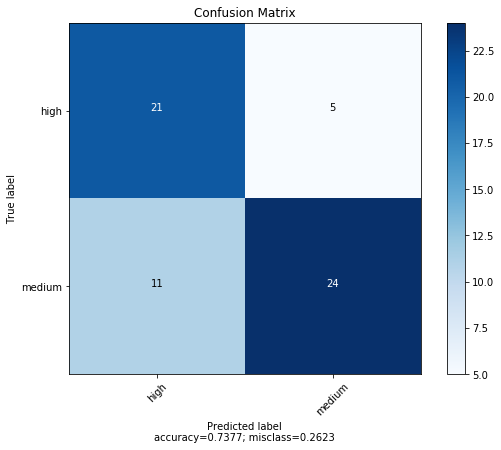

In [160]:
plot_confusion_matrix(cm = confusion_matrix(model1.predict(testX), testY), 
                      normalize    = False,
                      target_names = ['high', 'medium'],
                      title        = "Confusion Matrix")

# Gráfica de Importancias y Árbol


(array([0.06850847, 0.3143703 , 0.03839803, 0.10795407, 0.01687539,
       0.16822012, 0.0381402 , 0.        , 0.        , 0.02196796,
       0.01529794, 0.04753067, 0.16273684]), 0.8976897689768977)


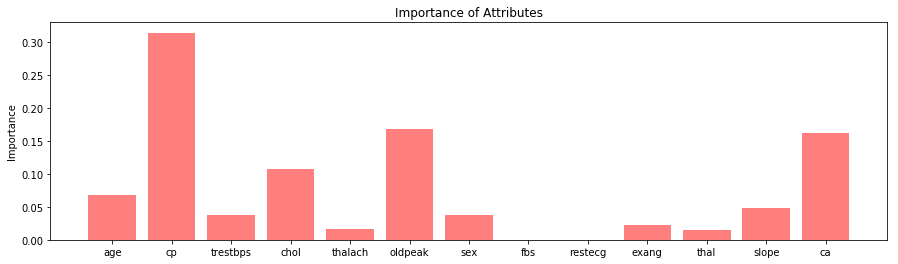

In [161]:
importances = model1.feature_importances_
print(importances, model1.score(features, target))

features_col = ["age", "cp", "trestbps", "chol", "thalach", "oldpeak", "sex", "fbs", "restecg", "exang", "thal", "slope", "ca"]

y_values = np.arange(len(features_col))

plt.figure(figsize=(15,4))
plt.bar(y_values, importances, align='center', alpha=0.5, color='r')
plt.xticks(y_values, features_col)
plt.ylabel('Importance')
plt.title('Importance of Attributes')

plt.show()

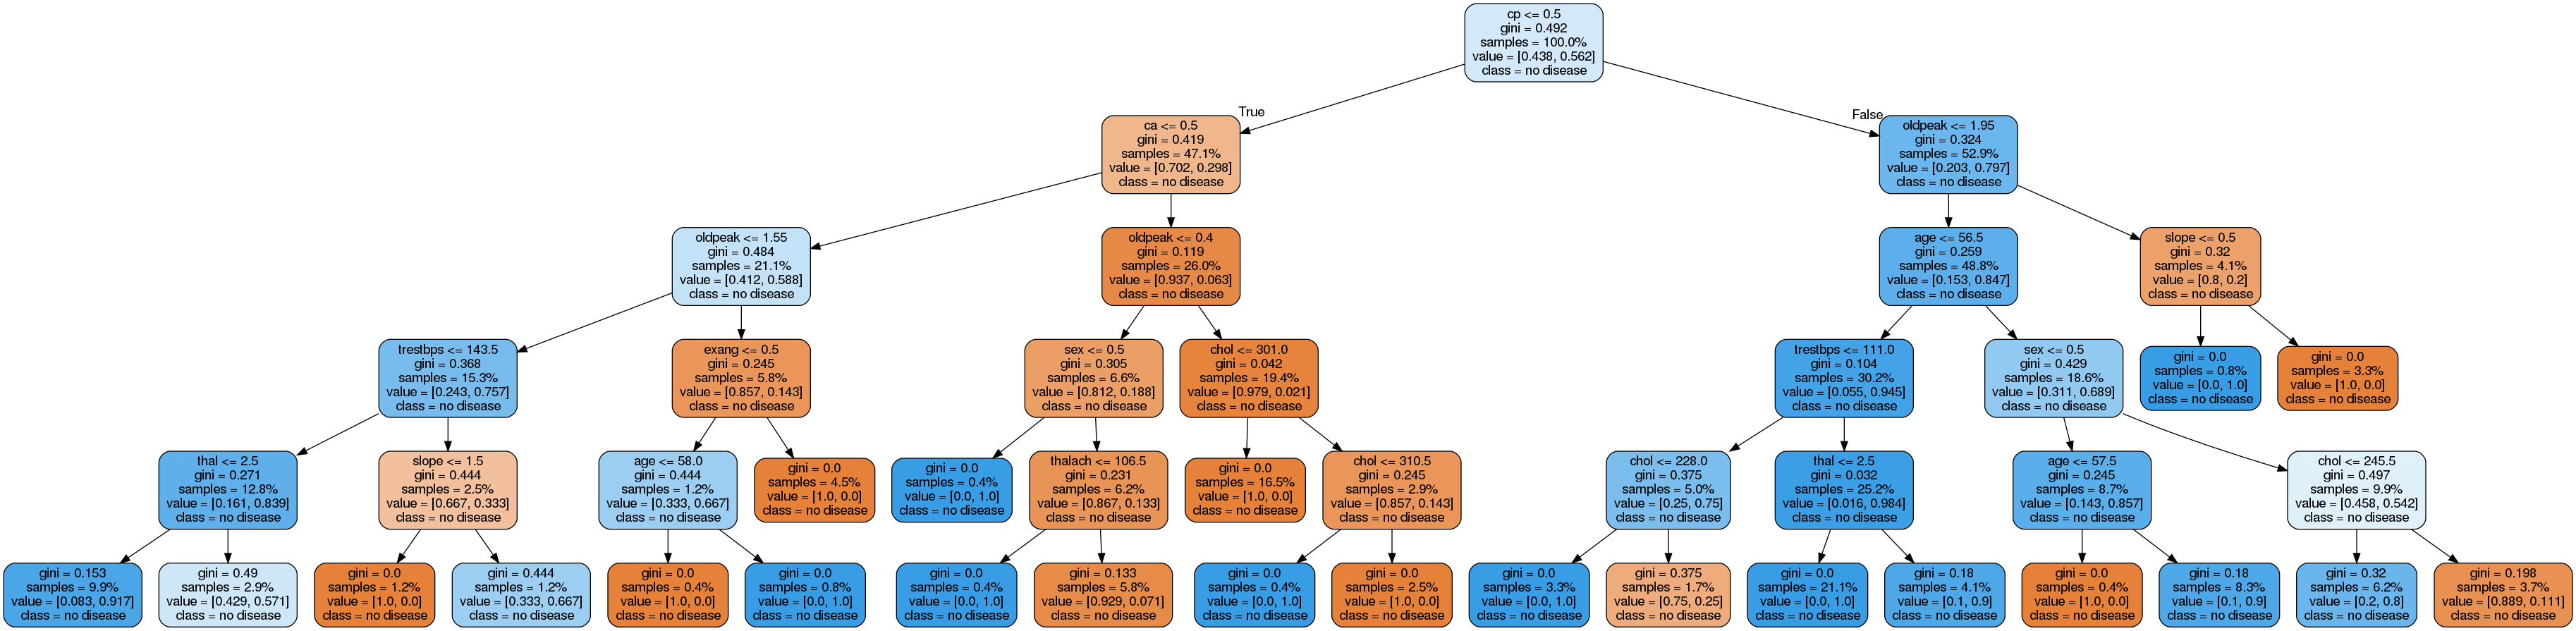

In [162]:

# c = -1;
# for i in importances:
#     c = c + 1
#     if(i == 0.0):
#         features_col.remove(features_col[c])
#         c = c - 1
    
        
        
# print(features_col)

y_train_str = trainY.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'

dot_data = StringIO()
export_graphviz(model1, out_file = dot_data, filled = True, rounded = True, proportion = True,
                feature_names = features_col, 
                class_names = y_train_str)


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


<h2>Interpretación</h2>

# Naive Bayes

In [130]:
model2 = gnb.fit(trainX, trainY)


#Print the score on the train data
print("Train: " + str(model2.score(trainX, trainY)))
#Print the score on the test data
print("Test: " + str(model2.score(testX, testY)))

# y_pred2 = model2.predict(testX)
# print(y_pred2)
# print("Accuracy: ",metrics.accuracy_score(testY, y_pred2))
# print(metrics.classification_report(testY, y_pred2))
# from sklearn.metrics import confusion_matrix



Train: 0.8388429752066116
Test: 0.8360655737704918


<h2>Matriz de confusión</h2>

In [132]:
confusion_matrix(model2.predict(testX), testY)

array([[25,  3],
       [ 7, 26]])

<h2>Interpretación</h2>

# Red Neuronal

In [137]:
# NN is sensitive to data scale. We must normilize
scaler = StandardScaler()  
trainXX = trainX.copy()
testXX = testX.copy()
# Don't cheat - fit only on training data
scaler.fit(trainX)  
trainXX = scaler.transform(trainXX)  
# apply same transformation to test data
testXX = scaler.transform(testXX)  

model3 = MLPClassifier(solver='lbfgs', alpha=1e-3, activation = 'relu', max_iter=5000,
                     hidden_layer_sizes = (1), random_state=1, verbose = True)

model3.fit(trainXX, trainY)                         

#Print the score on the train data
print("On training")
print(model3.score(trainXX, trainY))
print(confusion_matrix(model3.predict(trainXX), trainY))

#Print the score on the test data
print("\nOn test")
print(model3.score(testXX, testY))
print(confusion_matrix(model3.predict(testXX), testY))

On training
0.859504132231405
[[ 83  11]
 [ 23 125]]

On test
0.8360655737704918
[[24  2]
 [ 8 27]]


In [118]:
network = Sequential()
network.add(Dense(13, input_dim=13, activation='sigmoid'))
network.add(Dense(1, input_dim=13, activation='sigmoid'))
network.add(Dense(13, input_dim=13, activation='sigmoid'))


# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
network.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='mean_squared_error', optimizer='adam', metrics=['binary_accuracy'])
# network.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])


network.fit(trainX, trainY, epochs=1000)

scoreT = network.evaluate(testX, testY)
scoreE = network.evaluate(trainX, trainY)

print("Score del test")
print("%s: %.2f%%" % (network.metrics_names[1], scoreT[1]*100))
print("Score del entrenamiento")
print("%s: %.2f%%" % (network.metrics_names[1], scoreE[1]*100))

# predictions = network.predict_classes(testX)





Epoch 1/1000
242/242 [==============================] - 0s 2ms/step - loss: 2.6276 - binary_accuracy: 0.4895
Epoch 2/1000
242/242 [==============================] - 0s 56us/step - loss: 2.6146 - binary_accuracy: 0.4895
Epoch 3/1000
242/242 [==============================] - 0s 98us/step - loss: 2.6017 - binary_accuracy: 0.4955
Epoch 4/1000
242/242 [==============================] - 0s 111us/step - loss: 2.5887 - binary_accuracy: 0.4965
Epoch 5/1000
242/242 [==============================] - 0s 121us/step - loss: 2.5762 - binary_accuracy: 0.4965
Epoch 6/1000
242/242 [==============================] - 0s 61us/step - loss: 2.5637 - binary_accuracy: 0.4965
Epoch 7/1000
242/242 [==============================] - 0s 89us/step - loss: 2.5514 - binary_accuracy: 0.4965
Epoch 8/1000
242/242 [==============================] - 0s 94us/step - loss: 2.5401 - binary_accuracy: 0.4965
Epoch 9/1000
242/242 [==============================] - 0s 81us/step - loss: 2.5294 - binary_accuracy: 0.4997
Epoch 10/

242/242 [==============================] - 0s 59us/step - loss: 1.7023 - binary_accuracy: 0.4685
Epoch 75/1000
242/242 [==============================] - ETA: 0s - loss: 1.6942 - binary_accuracy: 0.456 - 0s 64us/step - loss: 1.6911 - binary_accuracy: 0.4685
Epoch 76/1000
242/242 [==============================] - 0s 55us/step - loss: 1.6800 - binary_accuracy: 0.4685
Epoch 77/1000
242/242 [==============================] - 0s 68us/step - loss: 1.6690 - binary_accuracy: 0.4685
Epoch 78/1000
242/242 [==============================] - 0s 60us/step - loss: 1.6581 - binary_accuracy: 0.4685
Epoch 79/1000
242/242 [==============================] - 0s 64us/step - loss: 1.6474 - binary_accuracy: 0.4685
Epoch 80/1000
242/242 [==============================] - 0s 64us/step - loss: 1.6367 - binary_accuracy: 0.4685
Epoch 81/1000
242/242 [==============================] - 0s 63us/step - loss: 1.6262 - binary_accuracy: 0.4685
Epoch 82/1000
242/242 [==============================] - 0s 58us/step - loss

242/242 [==============================] - 0s 62us/step - loss: 1.1443 - binary_accuracy: 0.4685
Epoch 148/1000
242/242 [==============================] - 0s 61us/step - loss: 1.1396 - binary_accuracy: 0.4685
Epoch 149/1000
242/242 [==============================] - 0s 67us/step - loss: 1.1350 - binary_accuracy: 0.4685
Epoch 150/1000
242/242 [==============================] - 0s 54us/step - loss: 1.1304 - binary_accuracy: 0.4685
Epoch 151/1000
242/242 [==============================] - ETA: 0s - loss: 1.1290 - binary_accuracy: 0.478 - 0s 52us/step - loss: 1.1259 - binary_accuracy: 0.4685
Epoch 152/1000
242/242 [==============================] - 0s 70us/step - loss: 1.1215 - binary_accuracy: 0.4685
Epoch 153/1000
242/242 [==============================] - 0s 56us/step - loss: 1.1171 - binary_accuracy: 0.4685
Epoch 154/1000
242/242 [==============================] - 0s 62us/step - loss: 1.1128 - binary_accuracy: 0.4685
Epoch 155/1000
242/242 [==============================] - 0s 64us/ste

/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.225437). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)
/usr/local/lib/python2.7/dist-packages/keras/callbacks.py:95: RuntimeWarning: Method (on_train_batch_end) is slow compared to the batch update (0.113926). Check your callbacks.
  % (hook_name, delta_t_median), RuntimeWarning)


242/242 [==============================] - 0s 69us/step - loss: 0.9334 - binary_accuracy: 0.4685
Epoch 214/1000
242/242 [==============================] - 0s 79us/step - loss: 0.9313 - binary_accuracy: 0.4685
Epoch 215/1000
242/242 [==============================] - 0s 82us/step - loss: 0.9292 - binary_accuracy: 0.4685
Epoch 216/1000
242/242 [==============================] - 0s 82us/step - loss: 0.9272 - binary_accuracy: 0.4685
Epoch 217/1000
242/242 [==============================] - 0s 66us/step - loss: 0.9252 - binary_accuracy: 0.4685
Epoch 218/1000
242/242 [==============================] - 0s 58us/step - loss: 0.9232 - binary_accuracy: 0.4685
Epoch 219/1000
242/242 [==============================] - 0s 57us/step - loss: 0.9213 - binary_accuracy: 0.4685
Epoch 220/1000
242/242 [==============================] - 0s 60us/step - loss: 0.9193 - binary_accuracy: 0.4685
Epoch 221/1000
242/242 [==============================] - 0s 62us/step - loss: 0.9174 - binary_accuracy: 0.4685
Epoch 2

242/242 [==============================] - 0s 58us/step - loss: 0.8283 - binary_accuracy: 0.4685
Epoch 287/1000
242/242 [==============================] - 0s 67us/step - loss: 0.8273 - binary_accuracy: 0.4685
Epoch 288/1000
242/242 [==============================] - 0s 75us/step - loss: 0.8263 - binary_accuracy: 0.4685
Epoch 289/1000
242/242 [==============================] - 0s 59us/step - loss: 0.8254 - binary_accuracy: 0.4685
Epoch 290/1000
242/242 [==============================] - 0s 61us/step - loss: 0.8244 - binary_accuracy: 0.4685
Epoch 291/1000
242/242 [==============================] - 0s 67us/step - loss: 0.8235 - binary_accuracy: 0.4685
Epoch 292/1000
242/242 [==============================] - 0s 64us/step - loss: 0.8226 - binary_accuracy: 0.4685
Epoch 293/1000
242/242 [==============================] - 0s 68us/step - loss: 0.8217 - binary_accuracy: 0.4685
Epoch 294/1000
242/242 [==============================] - 0s 60us/step - loss: 0.8208 - binary_accuracy: 0.4685
Epoch 2

242/242 [==============================] - 0s 63us/step - loss: 0.7766 - binary_accuracy: 0.4685
Epoch 359/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7761 - binary_accuracy: 0.4685
Epoch 360/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7756 - binary_accuracy: 0.4685
Epoch 361/1000
242/242 [==============================] - 0s 59us/step - loss: 0.7751 - binary_accuracy: 0.4685
Epoch 362/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7746 - binary_accuracy: 0.4685
Epoch 363/1000
242/242 [==============================] - 0s 59us/step - loss: 0.7741 - binary_accuracy: 0.4685
Epoch 364/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7736 - binary_accuracy: 0.4685
Epoch 365/1000
242/242 [==============================] - 0s 60us/step - loss: 0.7731 - binary_accuracy: 0.4685
Epoch 366/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7726 - binary_accuracy: 0.4685
Epoch 3

242/242 [==============================] - 0s 58us/step - loss: 0.7475 - binary_accuracy: 0.4685
Epoch 431/1000
242/242 [==============================] - 0s 67us/step - loss: 0.7472 - binary_accuracy: 0.4685
Epoch 432/1000
242/242 [==============================] - 0s 62us/step - loss: 0.7469 - binary_accuracy: 0.4685
Epoch 433/1000
242/242 [==============================] - 0s 67us/step - loss: 0.7466 - binary_accuracy: 0.4685
Epoch 434/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7463 - binary_accuracy: 0.4685
Epoch 435/1000
242/242 [==============================] - 0s 63us/step - loss: 0.7460 - binary_accuracy: 0.4685
Epoch 436/1000
242/242 [==============================] - 0s 63us/step - loss: 0.7457 - binary_accuracy: 0.4685
Epoch 437/1000
242/242 [==============================] - 0s 67us/step - loss: 0.7454 - binary_accuracy: 0.4685
Epoch 438/1000
242/242 [==============================] - 0s 54us/step - loss: 0.7451 - binary_accuracy: 0.4685
Epoch 4

242/242 [==============================] - 0s 58us/step - loss: 0.7294 - binary_accuracy: 0.4685
Epoch 504/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7292 - binary_accuracy: 0.4685
Epoch 505/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7290 - binary_accuracy: 0.4685
Epoch 506/1000
242/242 [==============================] - 0s 75us/step - loss: 0.7288 - binary_accuracy: 0.4685
Epoch 507/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7286 - binary_accuracy: 0.4685
Epoch 508/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7284 - binary_accuracy: 0.4685
Epoch 509/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7282 - binary_accuracy: 0.4685
Epoch 510/1000
242/242 [==============================] - 0s 69us/step - loss: 0.7281 - binary_accuracy: 0.4685
Epoch 511/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7279 - binary_accuracy: 0.4685
Epoch 5

242/242 [==============================] - 0s 57us/step - loss: 0.7176 - binary_accuracy: 0.4685
Epoch 577/1000
242/242 [==============================] - 0s 76us/step - loss: 0.7175 - binary_accuracy: 0.4685
Epoch 578/1000
242/242 [==============================] - 0s 70us/step - loss: 0.7174 - binary_accuracy: 0.4685
Epoch 579/1000
242/242 [==============================] - 0s 63us/step - loss: 0.7172 - binary_accuracy: 0.4685
Epoch 580/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7171 - binary_accuracy: 0.4685
Epoch 581/1000
242/242 [==============================] - 0s 62us/step - loss: 0.7170 - binary_accuracy: 0.4685
Epoch 582/1000
242/242 [==============================] - 0s 70us/step - loss: 0.7169 - binary_accuracy: 0.4685
Epoch 583/1000
242/242 [==============================] - 0s 63us/step - loss: 0.7167 - binary_accuracy: 0.4685
Epoch 584/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7166 - binary_accuracy: 0.4685
Epoch 5

242/242 [==============================] - 0s 74us/step - loss: 0.7096 - binary_accuracy: 0.4685
Epoch 650/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7095 - binary_accuracy: 0.4685
Epoch 651/1000
242/242 [==============================] - 0s 63us/step - loss: 0.7095 - binary_accuracy: 0.4685
Epoch 652/1000
242/242 [==============================] - 0s 59us/step - loss: 0.7094 - binary_accuracy: 0.4685
Epoch 653/1000
242/242 [==============================] - 0s 60us/step - loss: 0.7093 - binary_accuracy: 0.4685
Epoch 654/1000
242/242 [==============================] - 0s 62us/step - loss: 0.7092 - binary_accuracy: 0.4685
Epoch 655/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7091 - binary_accuracy: 0.4685
Epoch 656/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7090 - binary_accuracy: 0.4685
Epoch 657/1000
242/242 [==============================] - 0s 62us/step - loss: 0.7089 - binary_accuracy: 0.4685
Epoch 6

242/242 [==============================] - 0s 61us/step - loss: 0.7040 - binary_accuracy: 0.4685
Epoch 723/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7040 - binary_accuracy: 0.4685
Epoch 724/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7039 - binary_accuracy: 0.4685
Epoch 725/1000
242/242 [==============================] - 0s 64us/step - loss: 0.7038 - binary_accuracy: 0.4685
Epoch 726/1000
242/242 [==============================] - 0s 58us/step - loss: 0.7038 - binary_accuracy: 0.4685
Epoch 727/1000
242/242 [==============================] - 0s 61us/step - loss: 0.7037 - binary_accuracy: 0.4685
Epoch 728/1000
242/242 [==============================] - 0s 66us/step - loss: 0.7037 - binary_accuracy: 0.4685
Epoch 729/1000
242/242 [==============================] - 0s 59us/step - loss: 0.7036 - binary_accuracy: 0.4685
Epoch 730/1000
242/242 [==============================] - 0s 65us/step - loss: 0.7035 - binary_accuracy: 0.4685
Epoch 7

242/242 [==============================] - 0s 77us/step - loss: 0.7001 - binary_accuracy: 0.4685
Epoch 795/1000
242/242 [==============================] - 0s 70us/step - loss: 0.7001 - binary_accuracy: 0.4685
Epoch 796/1000
242/242 [==============================] - ETA: 0s - loss: 0.6927 - binary_accuracy: 0.435 - 0s 60us/step - loss: 0.7000 - binary_accuracy: 0.4685
Epoch 797/1000
242/242 [==============================] - 0s 67us/step - loss: 0.7000 - binary_accuracy: 0.4685
Epoch 798/1000
242/242 [==============================] - 0s 58us/step - loss: 0.6999 - binary_accuracy: 0.4685
Epoch 799/1000
242/242 [==============================] - 0s 70us/step - loss: 0.6999 - binary_accuracy: 0.4685
Epoch 800/1000
242/242 [==============================] - 0s 54us/step - loss: 0.6998 - binary_accuracy: 0.4685
Epoch 801/1000
242/242 [==============================] - 0s 69us/step - loss: 0.6998 - binary_accuracy: 0.4685
Epoch 802/1000
242/242 [==============================] - 0s 75us/ste

242/242 [==============================] - 0s 59us/step - loss: 0.6973 - binary_accuracy: 0.4685
Epoch 867/1000
242/242 [==============================] - 0s 57us/step - loss: 0.6972 - binary_accuracy: 0.4685
Epoch 868/1000
242/242 [==============================] - 0s 69us/step - loss: 0.6972 - binary_accuracy: 0.4685
Epoch 869/1000
242/242 [==============================] - 0s 62us/step - loss: 0.6971 - binary_accuracy: 0.4685
Epoch 870/1000
242/242 [==============================] - 0s 58us/step - loss: 0.6971 - binary_accuracy: 0.4685
Epoch 871/1000
242/242 [==============================] - 0s 55us/step - loss: 0.6971 - binary_accuracy: 0.4685
Epoch 872/1000
242/242 [==============================] - 0s 56us/step - loss: 0.6971 - binary_accuracy: 0.4685
Epoch 873/1000
242/242 [==============================] - 0s 62us/step - loss: 0.6970 - binary_accuracy: 0.4685
Epoch 874/1000
242/242 [==============================] - 0s 63us/step - loss: 0.6970 - binary_accuracy: 0.4685
Epoch 8

242/242 [==============================] - 0s 62us/step - loss: 0.6951 - binary_accuracy: 0.4685
Epoch 940/1000
242/242 [==============================] - 0s 72us/step - loss: 0.6951 - binary_accuracy: 0.4685
Epoch 941/1000
242/242 [==============================] - 0s 59us/step - loss: 0.6951 - binary_accuracy: 0.4685
Epoch 942/1000
242/242 [==============================] - 0s 57us/step - loss: 0.6951 - binary_accuracy: 0.4685
Epoch 943/1000
242/242 [==============================] - 0s 63us/step - loss: 0.6951 - binary_accuracy: 0.4685
Epoch 944/1000
242/242 [==============================] - 0s 60us/step - loss: 0.6950 - binary_accuracy: 0.4685
Epoch 945/1000
242/242 [==============================] - 0s 55us/step - loss: 0.6950 - binary_accuracy: 0.4685
Epoch 946/1000
242/242 [==============================] - 0s 55us/step - loss: 0.6950 - binary_accuracy: 0.4685
Epoch 947/1000
242/242 [==============================] - 0s 62us/step - loss: 0.6950 - binary_accuracy: 0.4685
Epoch 9

In [134]:
network.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 13)                182       
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 14        
_________________________________________________________________
dense_15 (Dense)             (None, 13)                26        
Total params: 222
Trainable params: 222
Non-trainable params: 0
_________________________________________________________________


In [135]:
for layer in network.layers:
    h=layer.get_weights()
    print (h)

[array([[-0.36429092,  0.2128092 ,  0.3971069 ,  0.10768621, -0.03640407,
         0.40544742,  0.43255273,  0.392592  ,  0.15702659,  0.0235095 ,
         0.03878393, -0.0407168 ,  0.3719305 ],
       [-0.0042645 , -0.12578198,  0.34234387, -0.17702673,  0.16492587,
        -0.28448403,  0.22018312,  0.36022365, -0.3557721 , -0.27569562,
        -0.17935413,  0.4463802 , -0.18350823],
       [-0.18000916,  0.30906963, -0.15213671, -0.03257168, -0.29110655,
        -0.34643883,  0.02497287,  0.1195327 , -0.2468334 ,  0.06862748,
         0.40096432,  0.01272514, -0.04308547],
       [-0.3663919 , -0.07197732, -0.25124037,  0.09275191, -0.03398296,
        -0.318278  , -0.13414055,  0.27855253, -0.3461263 ,  0.13534409,
        -0.25129297, -0.08792862,  0.518522  ],
       [ 0.15646857,  0.38800353, -0.46345517, -0.42285153, -0.41688165,
        -0.17050329,  0.2972227 ,  0.16670674, -0.32312435,  0.27013302,
        -0.43514013, -0.37324908, -0.42366377],
       [ 0.0346114 , -0.38398

<h2>Interpretación</h2>

# Comparación de los modelos 

# Conclusiones